In [12]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# # Define the sensors and input folder
# sensors = ['2P02', '2T01', '2T02', '2T03', '2T04']
# input_folder = '../Data_target/projectroom/'
# 
# # Initialize an empty list to store DataFrames
# dfs = []
# 
# # Loop through each sensor
# for sensor in sensors:
#     # Read the Excel file
#     df = pd.read_excel(f'{input_folder}{sensor}_processed.xlsx')
#     
#     # Ensure the 'Date' column is in datetime format
#     df['Date'] = pd.to_datetime(df['Date'])
#     
#     # Align 'Date' to the nearest 5-minute interval
#     df['Date'] = df['Date'].dt.floor('5T')
#     
#     # Rename the 'Count' column to include the sensor name
#     df = df.rename(columns={'Count': f'Count_{sensor}'})
#     
#     # Append the DataFrame to the list
#     dfs.append(df)
# 
# # Merge all DataFrames on the 'Date' column
# merged_df = dfs[0]
# for df in dfs[1:]:
#     merged_df = pd.merge(merged_df, df, on='Date', how='outer')
# 
# # Sort by Date
# merged_df = merged_df.sort_values('Date').reset_index(drop=True)
# 
# # Fill missing values with NaN
# merged_df = merged_df.fillna(np.nan)
# t_sensor_columns = [f'Count_{sensor}' for sensor in sensors if sensor.startswith('2T')]
# 
# # Add the 'occupancy' column
# merged_df['occupancy'] = (merged_df[t_sensor_columns].notna() & (merged_df[t_sensor_columns] != 0)).sum(axis=1)
# 
# # Save the merged DataFrame to a new Excel file
# output_file = '../Data_target/projectroom/merged_sensors_data.xlsx'
# merged_df.to_excel(output_file, index=False)
# 
# print(f'Merged data saved to {output_file}')


In [13]:
df = pd.read_excel('../Data_target/projectroom/merged_sensors_data.xlsx')

In [20]:
df['occupancy'].value_counts()
df = df[(df['Date'] >= '2024-06-15') & (df['Date'] < '2024-06-16')]


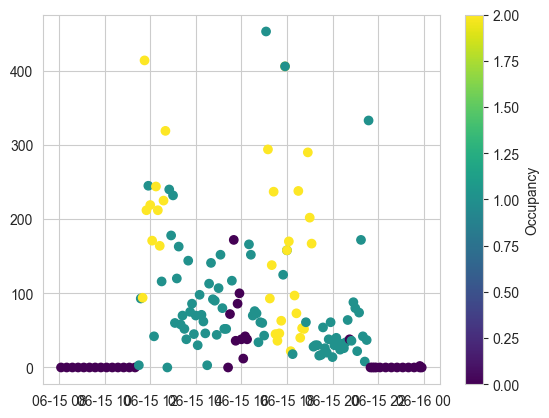

In [21]:
sc = plt.scatter(df['Date'], df['Count_2P02'], c=df['occupancy'], cmap='viridis')
plt.colorbar(sc, label='Occupancy')

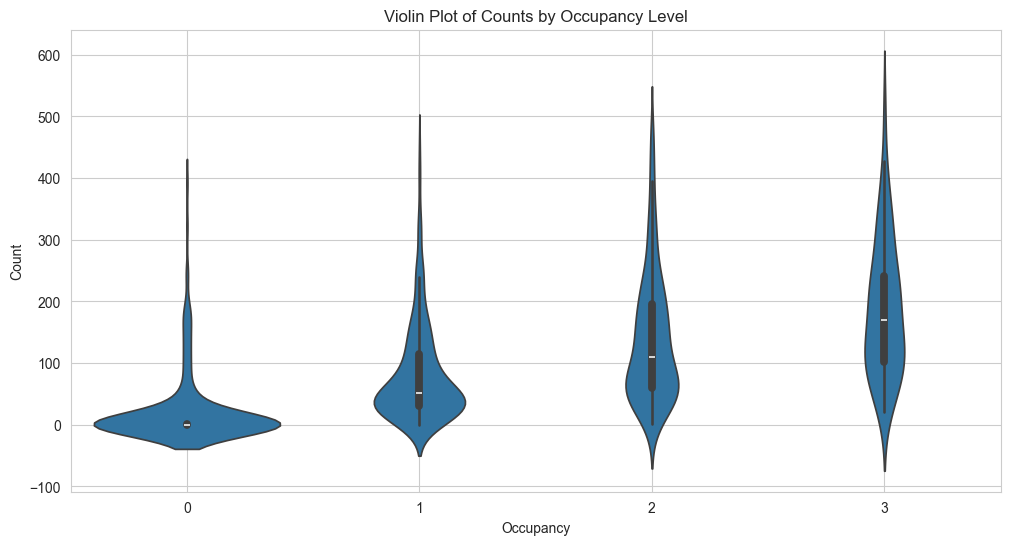

In [23]:
import seaborn as sns
df = pd.read_excel('../Data_target/projectroom/merged_sensors_data.xlsx')
plt.figure(figsize=(12, 6))
sns.violinplot(x='occupancy', y='Count_2P02', data=df)
plt.xlabel('Occupancy')
plt.ylabel('Count')
plt.title('Violin Plot of Counts by Occupancy Level')
plt.grid(True)
plt.show()